In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%cd ../..

/scratch/km817/iREC


In [4]:
import torch
import torch.distributions as dist
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from rec.utils import kl_estimate_with_mc, plot_running_sum_2d, plot_2d_distribution, kl_estimate_with_mc, compute_variational_posterior
from tqdm.notebook import trange
#import seaborn as sns; sns.set(); sns.set_style('whitegrid')
import math
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
plt.rcParams.update({'font.weight': 'normal'})
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'lines.linewidth' : 2})

In [6]:
torch.set_default_tensor_type(torch.DoubleTensor)

In [7]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [8]:
torch.manual_seed(100)

qs = []
ps = []
dims = [1, 5, 10, 25, 50, 75, 100]
for d in dims:
    rand_mat = torch.rand(size=(d,d))
    qs.append(dist.MultivariateNormal(loc= torch.ones(size=(d,)), covariance_matrix = torch.eye(d)))
    ps.append(dist.MultivariateNormal(loc=torch.zeros((d,)), covariance_matrix = torch.eye(d)))

In [9]:
from rec.beamsearch.Coders.Encoder_Variational import Encoder
from rec.beamsearch.distributions.CodingSampler import CodingSampler
from rec.beamsearch.distributions.VariationalPosterior import VariationalPosterior
from rec.beamsearch.samplers.GreedySampling import GreedySampler
from rec.OptimisingVars.VariationalOptimiser import VariationalOptimiser

In [10]:
coding_sampler = CodingSampler
auxiliary_posterior = VariationalPosterior
selection_sampler = GreedySampler

In [11]:
omega = 5
initial_seed = 0
beamwidth = 1
epsilon = 0.
initial_seed = initial_seed
var_time_1s = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time_1 = %timeit -o enc.run_encoder()
    var_time_1s.append(var_time_1)

/scratch/km817/miniconda3/envs/Torch/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


773 µs ± 707 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
828 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
867 µs ± 660 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
5.42 ms ± 15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.3 ms ± 98.2 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
90.8 ms ± 398 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
161 ms ± 574 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
omega = 5
initial_seed = 0
beamwidth = 5
epsilon = 0.
initial_seed = initial_seed
var_time_5s = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time_5 = %timeit -o enc.run_encoder()
    var_time_5s.append(var_time_5)

804 µs ± 564 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
894 µs ± 521 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
995 µs ± 382 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
9.12 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
85 ms ± 1.33 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
342 ms ± 7.37 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
916 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
omega = 5
initial_seed = 0
beamwidth = 10
epsilon = 0.
initial_seed = initial_seed
var_time_10s = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time_10 = %timeit -o enc.run_encoder()
    var_time_10s.append(var_time_10)

813 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
945 µs ± 239 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.03 ms ± 215 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
14.1 ms ± 43.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
148 ms ± 949 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
813 ms ± 21.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.73 s ± 11.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
omega = 5
initial_seed = 0
beamwidth = 20
epsilon = 0.
initial_seed = initial_seed
var_time_20s = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time_20 = %timeit -o enc.run_encoder()
    var_time_20s.append(var_time_20)

855 µs ± 355 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.07 ms ± 347 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.21 ms ± 874 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
25.4 ms ± 158 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
330 ms ± 5.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.53 s ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.37 s ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
omega = 5
initial_seed = 0
beamwidth = 50
epsilon = 0.
initial_seed = initial_seed
var_time_50s = []
for q in qs:

    enc = Encoder(q,
                 initial_seed,
                 coding_sampler,
                 selection_sampler,
                 auxiliary_posterior,
                 omega,
                 beamwidth=beamwidth,
                 epsilon=epsilon,
                 prior_var=1.)
    
    #enc.auxiliary_posterior.coding_sampler.auxiliary_vars = aux_vars
    var_time_50 = %timeit -o enc.run_encoder()
    var_time_50s.append(var_time_50)

950 µs ± 782 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.18 ms ± 1.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.25 ms ± 989 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
65.8 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
792 ms ± 6.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.72 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.03 s ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
for q, p in zip(qs, ps):
    print(dist.kl_divergence(q, p))

tensor(0.5000)
tensor(2.5000)
tensor(5.)
tensor(12.5000)
tensor(25.)
tensor(37.5000)
tensor(50.)


In [27]:
var_mean_times_1 = [t.average for t in var_time_1s]
var_mean_times_5 = [t.average for t in var_time_5s]
var_mean_times_10 = [t.average for t in var_time_10s]
var_mean_times_20 = [t.average for t in var_time_20s]
var_mean_times_50 = [t.average for t in var_time_50s]
var_mean_times = [var_mean_times_1, var_mean_times_5, var_mean_times_10, var_mean_times_20, var_mean_times_50]

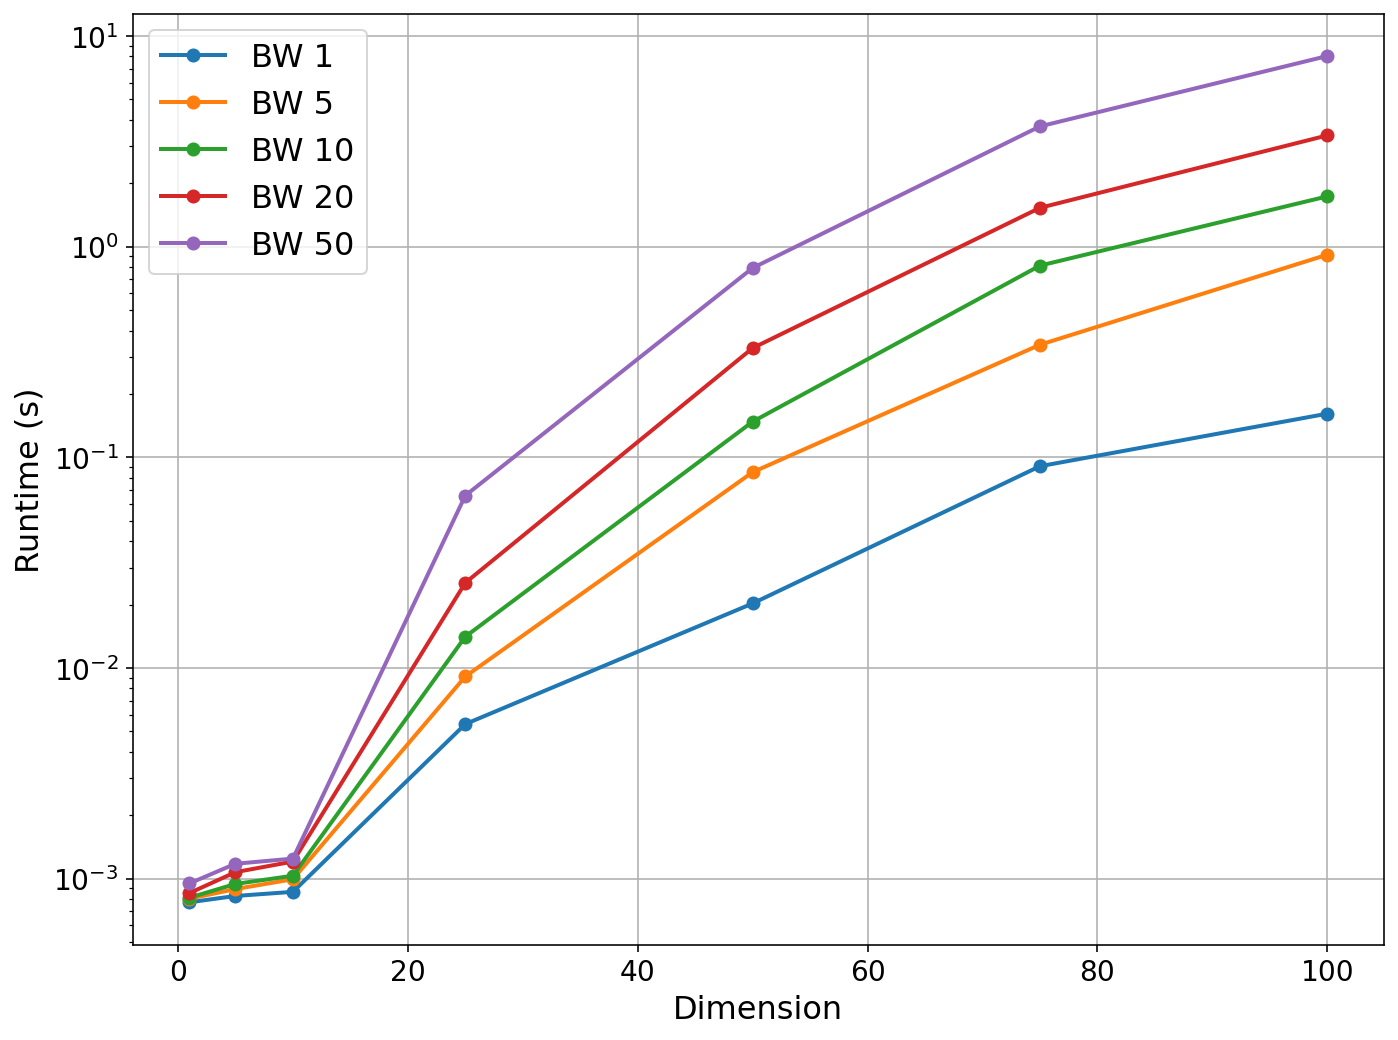

In [31]:
f, ax = plt.subplots(figsize=(10, 7.5))
fs = 16
for times in var_mean_times:
    ax.plot(dims, times, 'o-')
    ax.set_yscale('log')
ax.set_xlabel('Dimension', fontsize=fs)
ax.set_ylabel('Runtime (s)', fontsize=fs)
ax.tick_params(axis='both', which='major', labelsize=fs-2)
ax.tick_params(axis='both', which='minor', labelsize=fs-2)
ax.legend(['BW 1', 'BW 5', 'BW 10', 'BW 20', "BW 50"], fontsize=fs)
ax.grid()
f.tight_layout()
f.savefig("Figures/Thesis/beamwidth_runtimes.pdf", bbox_inches='tight')